In [ ]:
#https://davetang.org/muse/2018/05/15/making-a-heatmap-in-r-with-the-pheatmap-package/

In [1]:
library(tidyverse)
library(pheatmap)
library(data.table)
library(dendextend)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



---------------------
Welcome to dendextend version 1.19.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(pac

In [55]:
library(RColorBrewer)
library(viridis)

Loading required package: viridisLite



In [2]:
?read.table

read.table {utils},R Documentation
file,"the name of the file which the data are to be read from. Each row of the table appears as one line of the file. If it does not contain an absolute path, the file name is relative to the current working directory, getwd(). Tilde-expansion is performed where supported. This can be a compressed file (see file). Alternatively, file can be a readable text-mode connection (which will be opened for reading if necessary, and if so closed (and hence destroyed) at the end of the function call). (If stdin() is used, the prompts for lines may be somewhat confusing. Terminate input with a blank line or an EOF signal, Ctrl-D on Unix and Ctrl-Z on Windows. Any pushback on stdin() will be cleared before return.) file can also be a complete URL. (For the supported URL schemes, see the ‘URLs’ section of the help for url.)"
header,"a logical value indicating whether the file contains the names of the variables as its first line. If missing, the value is determined from the file format: header is set to TRUE if and only if the first row contains one fewer field than the number of columns."
sep,"the field separator character. Values on each line of the file are separated by this character. If sep = """" (the default for read.table) the separator is ‘white space’, that is one or more spaces, tabs, newlines or carriage returns."
quote,"the set of quoting characters. To disable quoting altogether, use quote = """". See scan for the behaviour on quotes embedded in quotes. Quoting is only considered for columns read as character, which is all of them unless colClasses is specified."
dec,the character used in the file for decimal points.
numerals,"string indicating how to convert numbers whose conversion to double precision would lose accuracy, see type.convert. Can be abbreviated. (Applies also to complex-number inputs.)"
row.names,"a vector of row names. This can be a vector giving the actual row names, or a single number giving the column of the table which contains the row names, or character string giving the name of the table column containing the row names. If there is a header and the first row contains one fewer field than the number of columns, the first column in the input is used for the row names. Otherwise if row.names is missing, the rows are numbered. Using row.names = NULL forces row numbering. Missing or NULL row.names generate row names that are considered to be ‘automatic’ (and not preserved by as.matrix)."
col.names,"a vector of optional names for the variables. The default is to use ""V"" followed by the column number."
as.is,"controls conversion of character variables (insofar as they are not converted to logical, numeric or complex) to factors, if not otherwise specified by colClasses. Its value is either a vector of logicals (values are recycled if necessary), or a vector of numeric or character indices which specify which columns should not be converted to factors. Note: to suppress all conversions including those of numeric columns, set colClasses = ""character"". Note that as.is is specified per column (not per variable) and so includes the column of row names (if any) and any columns to be skipped."
tryLogical,"a logical determining if columns consisting entirely of ""F"", ""T"", ""FALSE"", and ""TRUE"" should be converted to logical; passed to type.convert, true by default."


In [3]:
bulk_rna <- read.csv("data/bulk-rna_justin-cotney_20241031.csv")
bulk_rna <- as.data.frame(bulk_rna) %>% distinct(Gene, .keep_all = TRUE)
bulk_rna <- bulk_rna %>%
      column_to_rownames(var = "Gene")
bulk_rna

,CS13,CS14,CS15,CS17,CS22
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,4065.000000,4267.333333,3340.666667,3017.666667,652.5
TNMD,8.333333,80.666667,36.000000,77.000000,268.0
DPM1,1299.666667,1241.333333,1054.333333,1029.333333,249.0
SCYL3,1308.666667,1267.333333,1530.666667,1191.000000,451.0
C1orf112,1772.000000,1814.666667,1970.000000,1303.000000,375.5
FGR,14.666667,38.666667,22.333333,25.000000,12.5
CFH,42.333333,126.000000,159.666667,590.000000,921.5
FUCA2,1692.333333,1627.333333,1074.333333,1004.666667,245.5
GCLC,948.333333,916.333333,838.000000,765.000000,408.5


In [4]:
cal_z_score <- function(x){
  (x - mean(x)) / sd(x)
}
 
bulk_rna_norm <- t(apply(bulk_rna, 1, cal_z_score))
bulk_rna_norm

,CS13,CS14,CS15,CS17,CS22
TSPAN6,0.68986467,0.82995629,0.18835053,-0.03528832,-1.6728832
TNMD,-0.84159449,-0.13098747,-0.56979549,-0.16700902,1.7093865
DPM1,0.76980730,0.63160841,0.18858226,0.12935416,-1.7193521
SCYL3,0.38714428,0.28646078,0.92791208,0.10052110,-1.7020382
C1orf112,0.50096040,0.56673426,0.80619220,-0.22203815,-1.6518487
FGR,-0.76934829,1.54835367,-0.02897127,0.22855117,-0.9785853
CFH,-0.86727493,-0.64439584,-0.55471142,0.59165075,1.4747314
FUCA2,0.96472901,0.85344705,-0.09330565,-0.21257708,-1.5122933
GCLC,0.79758040,0.65013631,0.28920545,-0.04715139,-1.6897708
NFYA,0.24865497,0.46828981,0.79363276,0.23165098,-1.7422285


In [5]:
candidate <- fread("data/candidate-genes_unique.txt", header = FALSE)
candidate

V1
<chr>
VCAN
VGF
CYTL1
STK32B
DLD
CBLL1
CBLL1-AS1
SLC26A3
SLC25A44


In [6]:
bulk_rna_norm_tmp <- tibble::rownames_to_column(as.data.frame(bulk_rna_norm), "Gene")
bulk_rna_norm_candidate <- bulk_rna_norm_tmp %>% filter(Gene %in% candidate$V1) %>%
      column_to_rownames(var = "Gene")

In [7]:
bulk_rna_norm_candidate

,CS13,CS14,CS15,CS17,CS22
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WNT16,-1.23825668,-0.525590964,-0.13585190,0.521136803,1.3785627
DLX6,-0.70769372,0.098472164,1.21511186,0.653460747,-1.2593510
PTBP1,0.34646323,0.669263656,0.53302326,0.212696881,-1.7614470
MVP,-1.06026963,-0.602067608,-0.13893868,1.560843030,0.2404329
NUB1,0.68052194,0.525359565,0.30568675,0.250452313,-1.7620206
ISL1,0.44712370,0.788150251,0.18864723,0.319915383,-1.7438366
RNH1,0.03294638,0.107075729,0.24435231,1.195953533,-1.5803279
GCLM,1.12407188,0.822614160,-0.20965014,-0.364946537,-1.3720894
VCAN,-1.05332583,-1.103098995,0.43358261,0.889623597,0.8332186


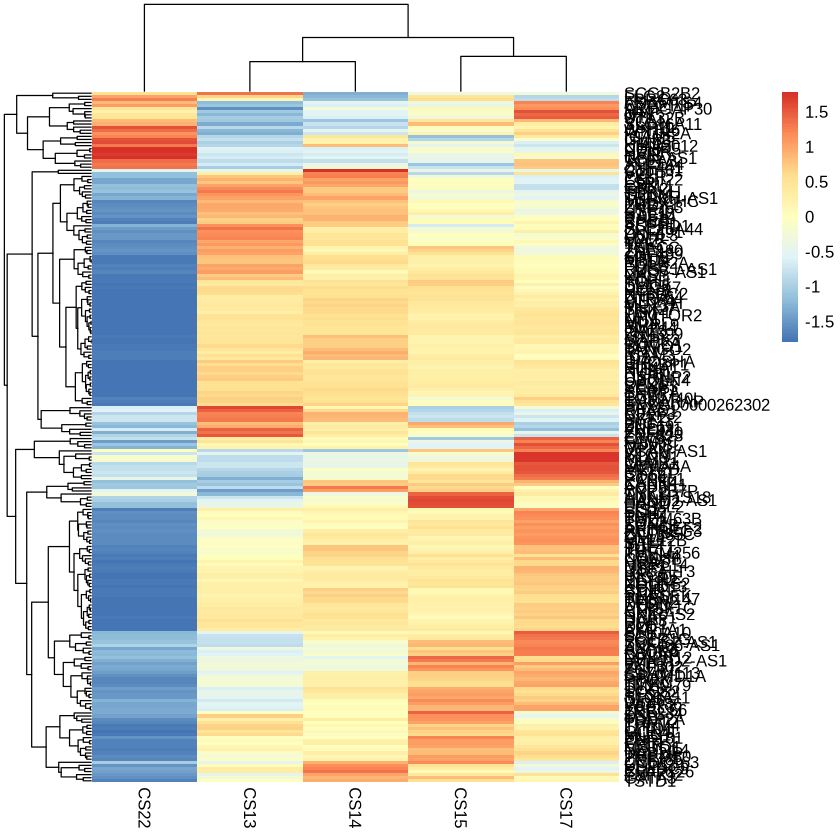

In [8]:
# create heatmap using pheatmap
pheatmap(bulk_rna_norm_candidate)

In [9]:
hclust_gene

ERROR: Error: object 'hclust_gene' not found


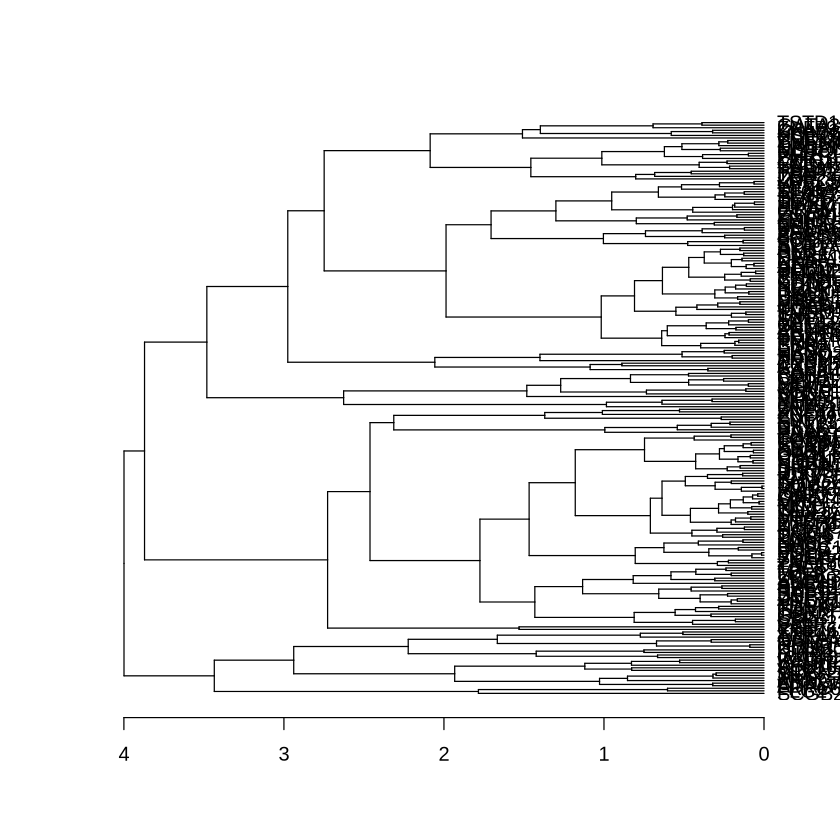

In [10]:
hclust_gene <- hclust(dist(bulk_rna_norm_candidate), method = "complete")

as.dendrogram(hclust_gene) %>%
  plot(horiz = TRUE)

In [11]:
gene_col <- cutree(tree = as.dendrogram(hclust_gene), k = 2)
gene_col <- data.frame(cluster = ifelse(test = gene_col == 1, yes = "1", no = "2"))
gene_col

,cluster
,<chr>
WNT16,1
DLX6,2
PTBP1,2
MVP,1
NUB1,2
ISL1,2
RNH1,2
GCLM,2
VCAN,1


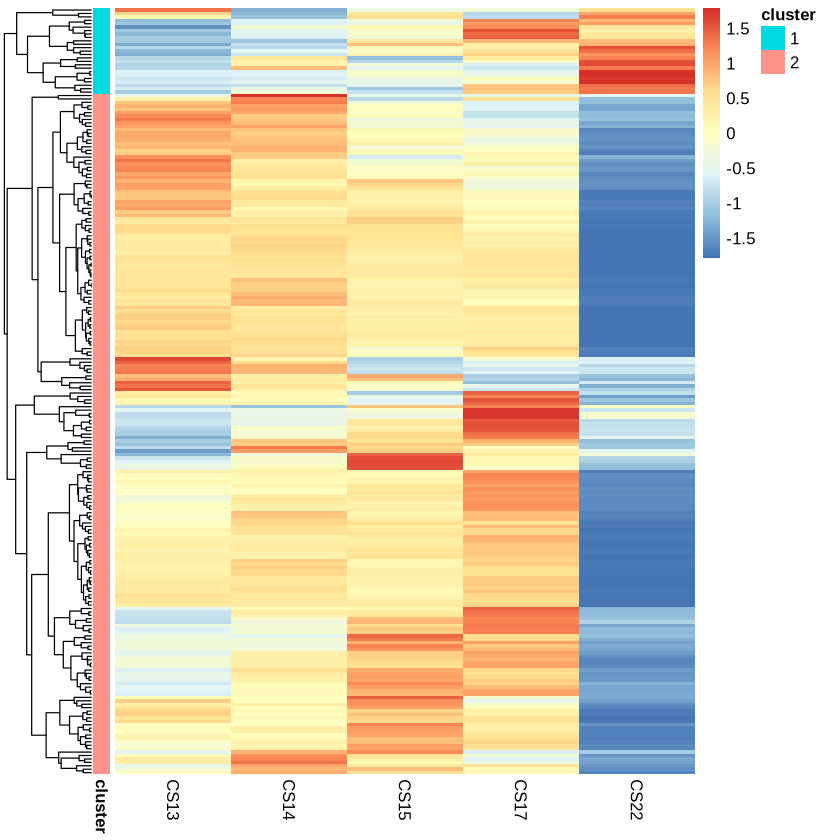

In [12]:
pheatmap(bulk_rna_norm_candidate, cluster_rows = hclust_gene, annotation_row = gene_col, cluster_cols= FALSE, show_rownames = FALSE)

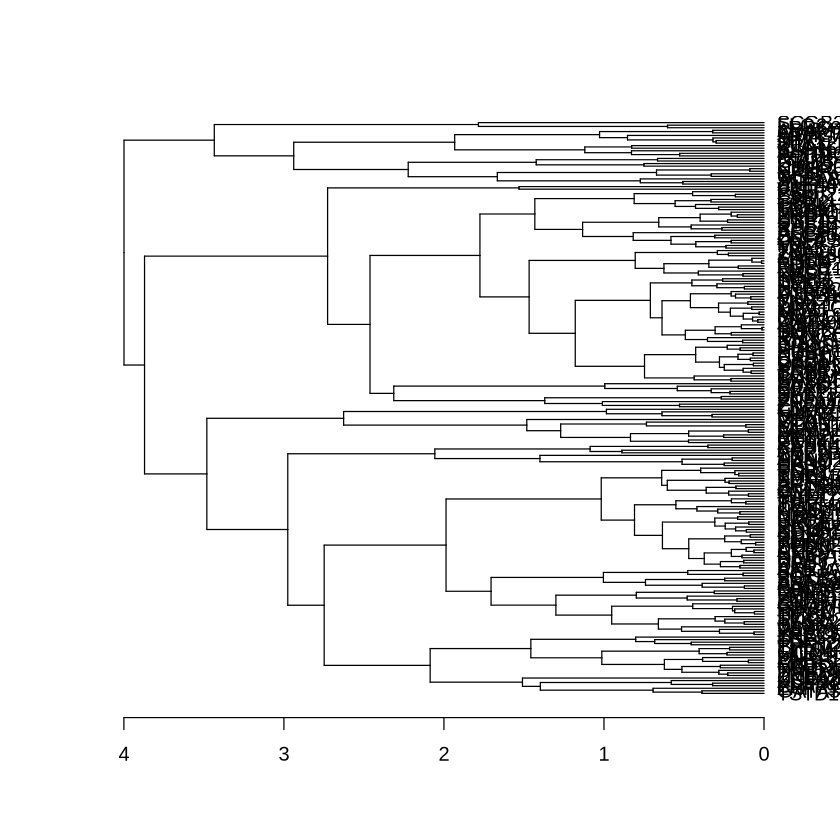

In [13]:
hclust_gene <- hclust(dist(bulk_rna_norm_candidate), method = "complete")

rev(as.dendrogram(hclust_gene)) %>%
  plot(horiz = TRUE)

hclust_gene_rev <- as.hclust(rev(as.dendrogram(hclust_gene)))

In [14]:
gene_col_rev <- cutree(tree = as.dendrogram(hclust_gene_rev), k = 2)
gene_col_rev <- data.frame(cluster = ifelse(test = gene_col_rev == 1, yes = "1", no = "2"))
gene_col_rev

,cluster
,<chr>
WNT16,1
DLX6,2
PTBP1,2
MVP,1
NUB1,2
ISL1,2
RNH1,2
GCLM,2
VCAN,1


In [15]:
sample_col <- data.frame(time_point = c("early", "early", "early", "late", "late"))
row.names(sample_col) <- colnames(bulk_rna_norm_candidate)
sample_col

,time_point
,<chr>
CS13,early
CS14,early
CS15,early
CS17,late
CS22,late


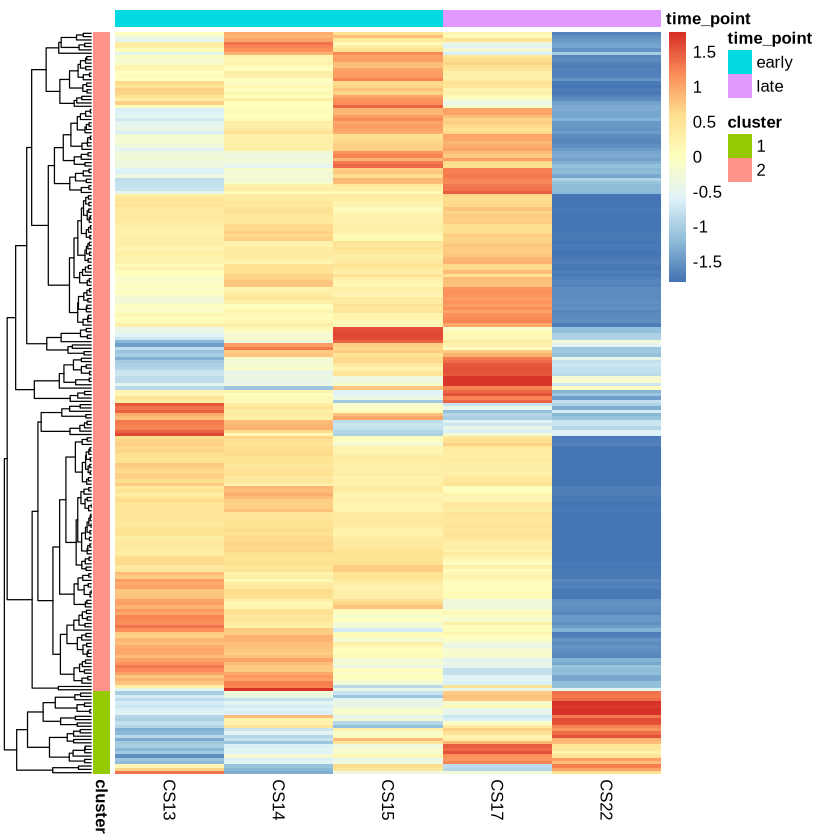

In [16]:
pheatmap(bulk_rna_norm_candidate, cluster_rows = hclust_gene_rev, annotation_row = gene_col_rev, annotation_col = sample_col, cluster_cols= FALSE, show_rownames = FALSE)

In [72]:
?pheatmap

pheatmap {pheatmap},R Documentation
mat,numeric matrix of the values to be plotted.
color,vector of colors used in heatmap.
kmeans_k,"the number of kmeans clusters to make, if we want to aggregate the rows before drawing heatmap. If NA then the rows are not aggregated."
breaks,"a sequence of numbers that covers the range of values in mat and is one element longer than color vector. Used for mapping values to colors. Useful, if needed to map certain values to certain colors, to certain values. If value is NA then the breaks are calculated automatically. When breaks do not cover the range of values, then any value larger than max(breaks) will have the largest color and any value lower than min(breaks) will get the lowest color."
border_color,"color of cell borders on heatmap, use NA if no border should be drawn."
cellwidth,"individual cell width in points. If left as NA, then the values depend on the size of plotting window."
cellheight,"individual cell height in points. If left as NA, then the values depend on the size of plotting window."
scale,"character indicating if the values should be centered and scaled in either the row direction or the column direction, or none. Corresponding values are ""row"", ""column"" and ""none"""
cluster_rows,"boolean values determining if rows should be clustered or hclust object,"
cluster_cols,boolean values determining if columns should be clustered or hclust object.


In [92]:
#https://www.biostars.org/p/420841/

In [17]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [18]:
total <- readRDS("/home/Karl/datastore/scRNAseq_GSE155121_human_embryo_CS10to14/20230812_withvelo/Processed_data/scRNA/Step1f_cleaned_annotated.rds")
pbmc.markers <- readRDS("/home/Karl/datastore/scRNAseq_GSE155121_human_embryo_CS10to14/20230812_withvelo/Processed_data/scRNA/Total_cluster_markers.rds")

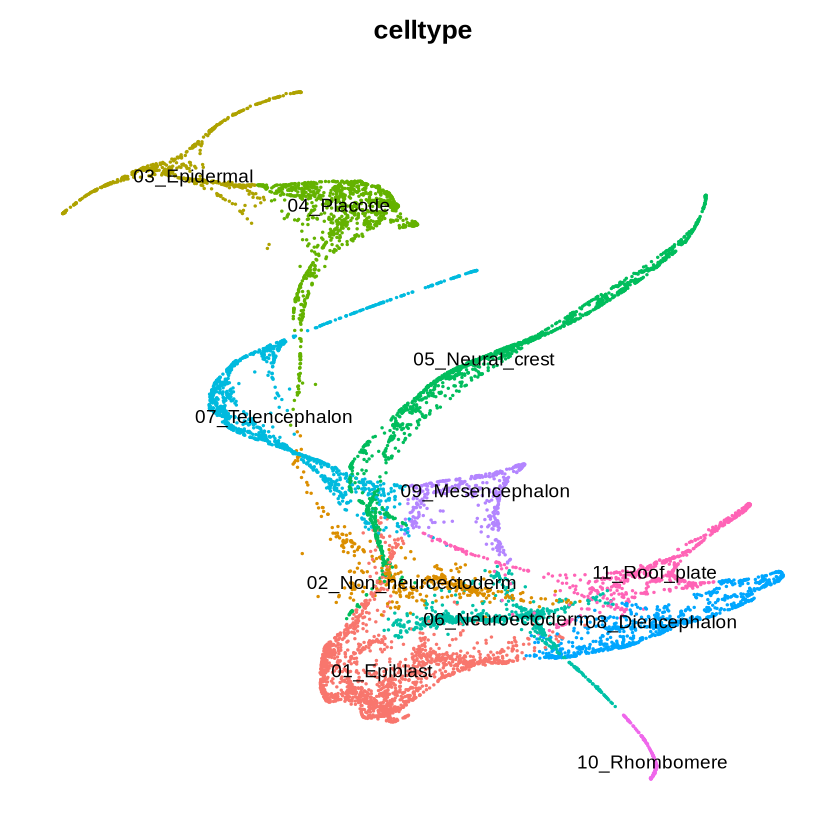

In [19]:
# options(repr.plot.width=10, repr.plot.height=10)
DimPlot(total, group.by = 'celltype', reduction = "draw_graph_fa", label = TRUE) & NoAxes() & NoLegend()

Idents(total) <- "celltype"
levels(total) <- c("01_Epiblast",
                  '02_Non_neuroectoderm',
                  '03_Epidermal',
                  '04_Placode',
                  '05_Neural_crest',
                  '06_Neuroectoderm',
                  '07_Telencephalon',
                  '08_Diencephalon',
                  '09_Mesencephalon',
                  '10_Rhombomere',
                  '11_Roof_plate')

In [20]:
placode_and_crest <- subset(total, idents = c("04_Placode", "05_Neural_crest"))

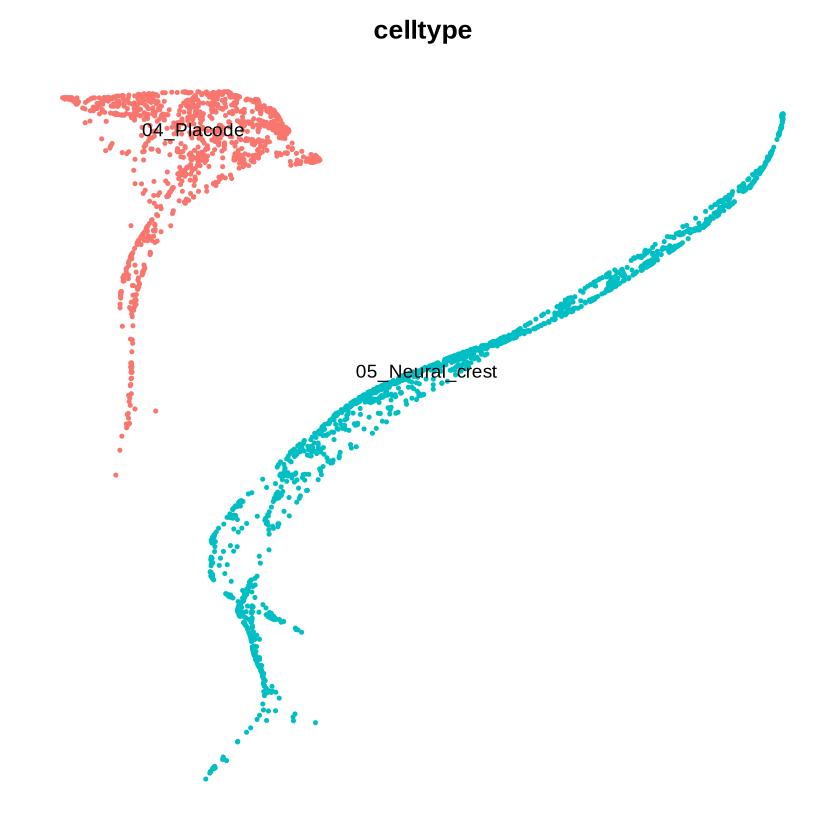

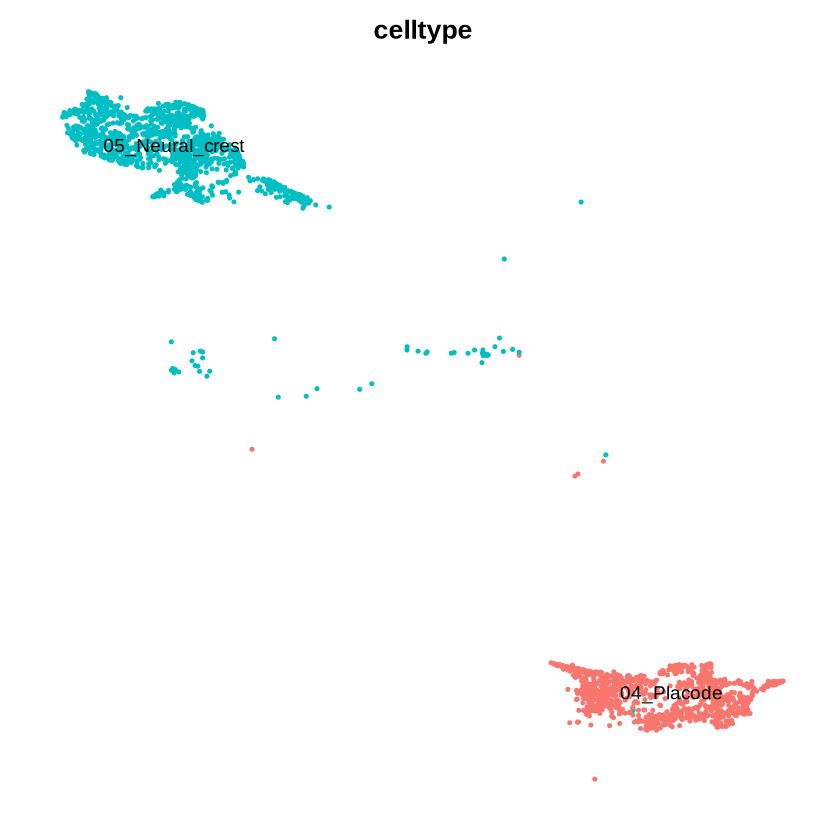

In [21]:
DimPlot(placode_and_crest, group.by = 'celltype', reduction = "draw_graph_fa", label = TRUE) & NoAxes() & NoLegend()
DimPlot(placode_and_crest, group.by = 'celltype', label = TRUE) & NoAxes() & NoLegend()

In [22]:
celltype_label <- as.data.frame(placode_and_crest@active.ident)
celltype_label <- tibble::rownames_to_column(as.data.frame(celltype_label), "barcode")
colnames(celltype_label) <- c("barcode", "celltype")

In [23]:
celltype_label

barcode,celltype
<chr>,<fct>
AAACCCACAAAGGCTG-2,04_Placode
AAACCCATCTGAATGC-2,04_Placode
AAACGAACAAGACGGT-2,05_Neural_crest
AAACGAAGTAGTTCCA-2,05_Neural_crest
AAACGAATCAGCACCG-2,04_Placode
AAACGCTGTCATCGCG-2,04_Placode
AAACGCTGTGATTAGA-2,05_Neural_crest
AAAGGATGTCAAAGTA-2,05_Neural_crest
AAAGGGCCAGGTCCCA-2,04_Placode


In [24]:
cell_matrix <- t(as.data.frame(placode_and_crest@assays[["RNA"]]@counts))
cell_matrix <- tibble::rownames_to_column(as.data.frame(cell_matrix), "barcode")

In [25]:
cell_matrix_labeled <- merge(celltype_label, cell_matrix, by = "barcode")

In [26]:
cell_matrix_labeled

barcode,celltype,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,⋯,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCACAAAGGCTG-2,04_Placode,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACCCATCTGAATGC-2,04_Placode,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACCTGGTGATAAGT-1,04_Placode,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACCTGTCGTTTGCC-1,05_Neural_crest,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGAACAAGACGGT-2,05_Neural_crest,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGAAGTAGTTCCA-2,05_Neural_crest,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGAATCAGCACCG-2,04_Placode,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGCTGTCATCGCG-2,04_Placode,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACGCTGTGATTAGA-2,05_Neural_crest,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [27]:
placode_matrix_t <- cell_matrix_labeled %>% filter(celltype == "04_Placode") %>% select(-c("celltype")) %>% column_to_rownames(var = "barcode")
crest_matrix_t <- cell_matrix_labeled %>% filter(celltype == "05_Neural_crest") %>% select(-c("celltype")) %>% column_to_rownames(var = "barcode")

placode_matrix <- t(placode_matrix_t)
crest_matrix <- t(crest_matrix_t)

In [28]:
placode_matrix

,AAACCCACAAAGGCTG-2,AAACCCATCTGAATGC-2,AAACCTGGTGATAAGT-1,AAACGAATCAGCACCG-2,AAACGCTGTCATCGCG-2,AAAGGGCCAGGTCCCA-2,AAAGTAGGTGGTCCGT-1,AAAGTGAGTTTGTTCT-2,AAATGGACAATTCTTC-2,AACAAAGAGCGCCTTG-2,⋯,TTTATGCAGCCTGAGA-2,TTTATGCGTATGAATG-1,TTTCACAGTCGTTGCG-2,TTTCAGTTCGAGTGGA-2,TTTCATGTCCGTGGCA-2,TTTCCTCAGGAAACGA-2,TTTGACTTCACCGGTG-2,TTTGGAGGTATCGCAT-2,TTTGGTTAGCTTACGT-2,TTTGTTGAGGATGTTA-2
MIR1302-2HG,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
FAM138A,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
OR4F5,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
AL627309.1,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
AL627309.3,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
AL627309.2,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
AL627309.5,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.3286270,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
AL627309.4,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
AP006222.2,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000
AL732372.1,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000,⋯,0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.000000,0.0000000,0.0000000


In [29]:
expression_placode <- as.data.frame(rowMeans(placode_matrix))
expression_crest <- as.data.frame(rowMeans(crest_matrix))

colnames(expression_placode) <- "placode"
colnames(expression_crest) <- "cncc"

In [30]:
expression_placode
expression_crest

,placode
,<dbl>
MIR1302-2HG,0.000000000
FAM138A,0.000000000
OR4F5,0.000000000
AL627309.1,0.000000000
AL627309.3,0.000000000
AL627309.2,0.000000000
AL627309.5,0.003923049
AL627309.4,0.000000000
AP006222.2,0.000000000


,cncc
,<dbl>
MIR1302-2HG,0.0000000000
FAM138A,0.0000000000
OR4F5,0.0000000000
AL627309.1,0.0004388130
AL627309.3,0.0000000000
AL627309.2,0.0000000000
AL627309.5,0.0033447135
AL627309.4,0.0000000000
AP006222.2,0.0000000000


In [31]:
summary(expression_placode)
summary(expression_crest)

    placode        
 Min.   :0.000000  
 1st Qu.:0.000000  
 Median :0.003666  
 Mean   :0.097300  
 3rd Qu.:0.077148  
 Max.   :5.139040  

      cncc         
 Min.   :0.000000  
 1st Qu.:0.000000  
 Median :0.003257  
 Mean   :0.095965  
 3rd Qu.:0.070525  
 Max.   :4.779584  

In [64]:
expression_placode_crest <- merge(expression_placode, expression_crest,
                          by = 'row.names')  %>% column_to_rownames(var = "Row.names")
expression_placode_crest

,placode,cncc
,<dbl>,<dbl>
A1BG,0.0015915236,0.0030887614
A1BG-AS1,0.0004670633,0.0024674101
A1CF,0.0017742216,0.0035218233
A2M,0.0129468412,0.0240616986
A2M-AS1,0.0025922415,0.0057510895
A2ML1,0.0055981739,0.0029419770
A2ML1-AS1,0.1332356896,0.1116960179
A2ML1-AS2,0.0000000000,0.0000000000
A3GALT2,0.0005594545,0.0024560639


In [65]:
# write.table(merge(expression_placode, expression_crest, by = 'row.names'), file='outputs/scrna_placode-and-crest_expression-matrix.tsv', quote=FALSE, sep='\t', col.names = TRUE)

In [66]:
summary(expression_placode_crest)

    placode              cncc         
 Min.   :0.000000   Min.   :0.000000  
 1st Qu.:0.000000   1st Qu.:0.000000  
 Median :0.003666   Median :0.003257  
 Mean   :0.097300   Mean   :0.095965  
 3rd Qu.:0.077148   3rd Qu.:0.070525  
 Max.   :5.139040   Max.   :4.779584  

In [67]:
expression_placode_crest$placode <- ifelse(expression_placode_crest$placode > 0.077148, "expressed", "not_expressed")
expression_placode_crest$cncc <- ifelse(expression_placode_crest$cncc > 0.070525, "expressed", "not_expressed")
expression_placode_crest

,placode,cncc
,<chr>,<chr>
A1BG,not_expressed,not_expressed
A1BG-AS1,not_expressed,not_expressed
A1CF,not_expressed,not_expressed
A2M,not_expressed,not_expressed
A2M-AS1,not_expressed,not_expressed
A2ML1,not_expressed,not_expressed
A2ML1-AS1,expressed,expressed
A2ML1-AS2,not_expressed,not_expressed
A3GALT2,not_expressed,not_expressed


In [68]:
table(expression_placode_crest$placode)
table(expression_placode_crest$cncc)


    expressed not_expressed 
         9150         27451 


    expressed not_expressed 
         9150         27451 

In [69]:
gene_col_rev_with_expression <- merge(gene_col_rev, expression_placode_crest,
                          by = 'row.names', all.x = TRUE)  %>% column_to_rownames(var = "Row.names")
gene_col_rev_with_expression[is.na(gene_col_rev_with_expression)] <- "not_expressed"
gene_col_rev_with_expression

,cluster,placode,cncc
,<chr>,<chr>,<chr>
ACP5,2,not_expressed,not_expressed
ADAMTS18,2,expressed,not_expressed
ADAMTS4,1,not_expressed,not_expressed
AKR1A1,2,expressed,expressed
ARHGAP30,1,not_expressed,not_expressed
ARHGEF2,2,expressed,expressed
ASAP3,2,not_expressed,not_expressed
ASH1L,1,expressed,expressed
ASPHD1,2,not_expressed,not_expressed


In [218]:
# write.table(gene_col_rev_with_expression, file='outputs/cluster_and_expression-matrix.tsv', quote=FALSE, sep='\t', col.names = TRUE)

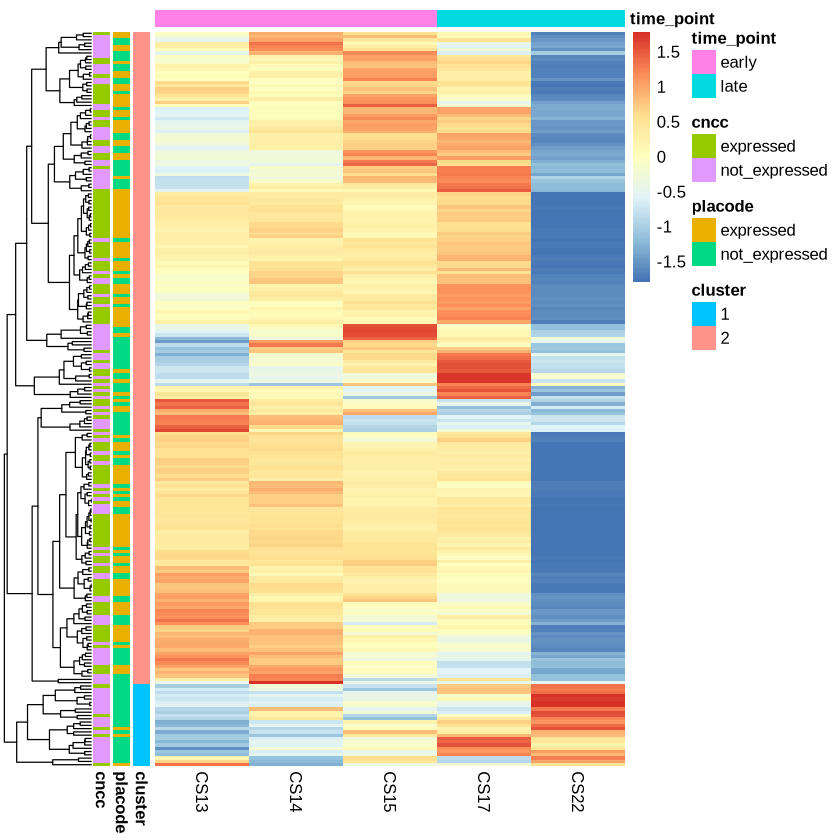

In [70]:
pheatmap(bulk_rna_norm_candidate, cluster_rows = hclust_gene_rev, annotation_row = gene_col_rev_with_expression, annotation_col = sample_col, cluster_cols= FALSE, show_rownames = FALSE)

In [179]:
ann_colour = list(
    cncc = c(not_expressed = "#DDF8FB", expressed = "#54DFE6"),
    placode = c(not_expressed = "#F2CEEE", expressed = "#B874D6")
    # cluster = c("1" = "grey60", "2" = "grey80")
)

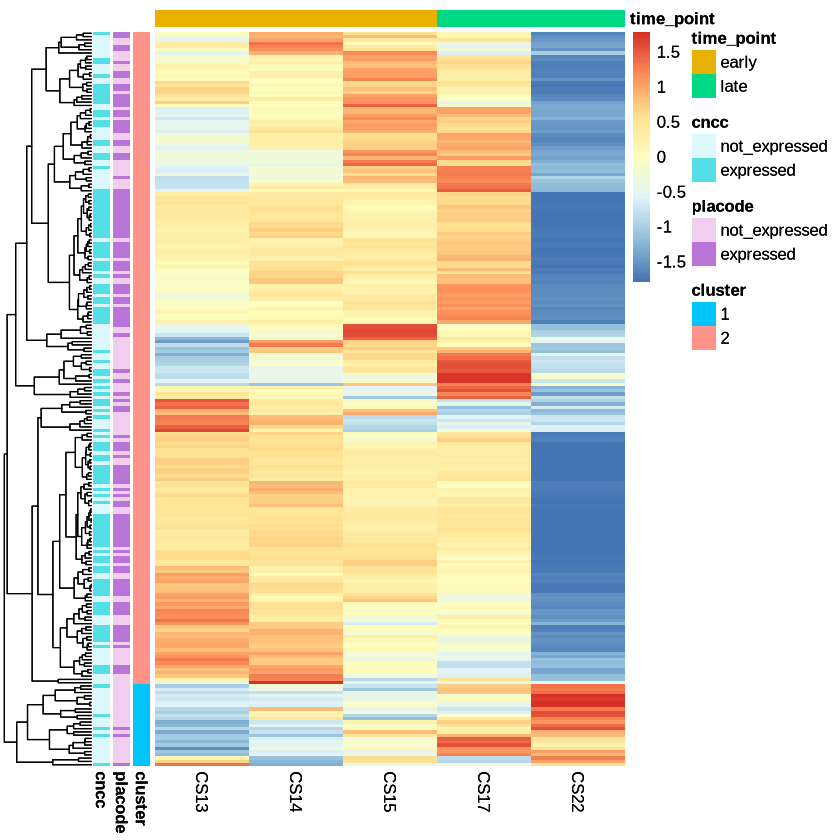

In [216]:
p <- pheatmap(bulk_rna_norm_candidate, 
         cluster_rows = hclust_gene_rev, 
         annotation_row = gene_col_rev_with_expression, 
         annotation_col = sample_col, 
         cluster_cols= FALSE, 
         show_rownames = FALSE,
         annotation_colors = ann_colour,
         # color = colorRampPalette(brewer.pal(9,"RdYlBu"))(50)
        )
p

In [217]:
ggsave(p, file = "plots/heatmap_candidate-expression.svg", dpi = 600)

Saving 6.67 x 6.67 in image


In [137]:
colorRampPalette(brewer.pal(9,"Blues"))(100)

[1] "#F7FBFF" "#F4F9FE" "#F2F8FD" "#F0F7FD" "#EEF5FC" "#ECF4FB" "#EAF3FB"
  [8] "#E8F1FA" "#E6F0F9" "#E4EFF9" "#E2EEF8" "#E0ECF7" "#DEEBF7" "#DCEAF6"
 [15] "#DAE8F5" "#D8E7F5" "#D6E6F4" "#D5E5F4" "#D3E3F3" "#D1E2F2" "#CFE1F2"
 [22] "#CDDFF1" "#CBDEF0" "#C9DDF0" "#C7DBEF" "#C5DAEE" "#C1D9ED" "#BED7EC"
 [29] "#BBD6EB" "#B8D5EA" "#B5D3E9" "#B1D2E7" "#AED1E6" "#ABCFE5" "#A8CEE4"
 [36] "#A4CCE3" "#A1CBE2" "#9ECAE1" "#9AC8E0" "#96C5DF" "#92C3DE" "#8EC1DD"
 [43] "#89BEDC" "#85BCDB" "#81BADA" "#7DB8DA" "#79B5D9" "#75B3D8" "#71B1D7"
 [50] "#6DAFD6" "#69ACD5" "#66AAD4" "#62A8D2" "#5FA6D1" "#5CA3D0" "#58A1CE"
 [57] "#559FCD" "#529DCC" "#4E9ACB" "#4B98C9" "#4896C8" "#4493C7" "#4191C5"
 [64] "#3E8EC4" "#3C8CC3" "#3989C1" "#3686C0" "#3484BE" "#3181BD" "#2E7EBC"
 [71] "#2C7CBA" "#2979B9" "#2776B8" "#2474B6" "#2171B5" "#1F6FB3" "#1D6CB1"
 [78] "#1B69AF" "#1967AD" "#1764AB" "#1562A9" "#135FA7" "#115CA5" "#0F5AA3"
 [85] "#0D57A1" "#0B559F" "#09529D" "#084F9A" "#084D96" "#084A92" "#08478E"
 [92] "#08458A" "#084286" "#083F82" "#083D7E" "#083A7A" "#083776" "#083572"
 [99] "#08326E" "#08306B"